python实现，遍历所有数据点，找出$n$个距离最近的点的分类情况，少数服从多数

In [85]:
import numpy as np
import random
import math
import pandas as pd

import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from collections import Counter

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [86]:
class KNN:
    def __init__(self, X_train, y_train, n_neighbors=3, p=2): # 通过n_neighbors修改k值
        """
        parameter: n_neighbors 临近点个数
        parameter: p 距离度量
        """
        self.n = n_neighbors
        self.p = p
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X):
        # 取出n个点
        knn_list = []
        for i in range(self.n):
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            knn_list.append((dist, self.y_train[i]))

        for i in range(self.n, len(self.X_train)):
            max_index = knn_list.index(max(knn_list, key=lambda x: x[0]))
            dist = np.linalg.norm(X - self.X_train[i], ord=self.p)
            if knn_list[max_index][0] > dist:
                knn_list[max_index] = (dist, self.y_train[i])

        # 统计
        knn = [k[-1] for k in knn_list]
        count_pairs = Counter(knn)
#         max_count = sorted(count_pairs, key=lambda x: x)[-1]
        max_count = sorted(count_pairs.items(), key=lambda x: x[1])[-1][0]
        return max_count

    def score(self, X_test, y_test):
        right_count = 0
        n = 10
        for X, y in zip(X_test, y_test):
            label = self.predict(X)
            if label == y:
                right_count += 1
        return right_count / len(X_test)

In [87]:
# 实验参数：选择不同的数据集
dataset = datasets.load_iris()
#dataset = datasets.load_wine()
#dataset = datasets.load_breast_cancer()

    sample_rates  K_value  precision
0            1.0        1       1.00
1            1.0        3       0.97
2            1.0        5       1.00
3            1.0       10       0.93
4            0.5        1       1.00
5            0.5        3       0.93
6            0.5        5       0.93
7            0.5       10       1.00
8            0.2        1       0.83
9            0.2        3       1.00
10           0.2        5       0.83
11           0.2       10       1.00


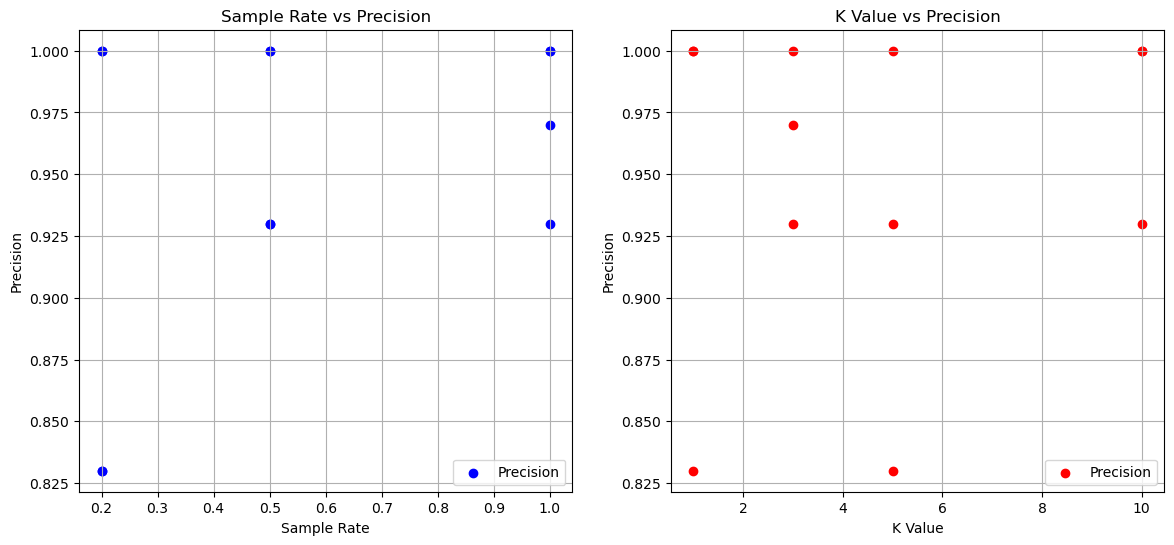

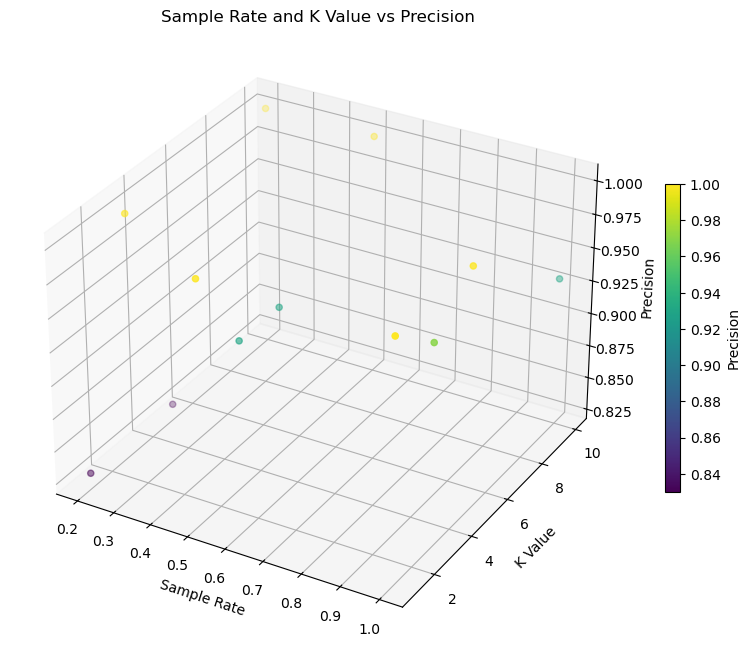

In [88]:
sample_rates = []
K_values = []
precisions = []
# 实验参数：选择不同的数据规模
for i in range(3):
    for j in range(4):
        sample_rate_list = [1,0.5,0.2] # 采样率（可以选择小于1）
        sample_rate = sample_rate_list[i]
        assert sample_rate>0 and sample_rate<=1
        nSample = math.floor(dataset.data.shape[0]*sample_rate)
        idx = random.sample(range(dataset.data.shape[0]), nSample)

        X = dataset.data[idx][:]
        y = dataset.target[idx][:]
        y_stat = Counter(y)
        # print('======================= dataset information =======================')
        # print('Total sample number: %d, Feature dimension: %d, Category number: %d' % (X.shape[0], X.shape[1], len(y_stat)))
        # for category in y_stat:
        #     print('category %d has %d samples' % (category, y_stat[category]))

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        # print('Training sample number: %d, Test sample number: %d' % (X_train.shape[0], X_test.shape[0]))

        # 实验参数：选择不同的K值
        K_list = [1, 3, 5, 10]
        K = K_list[j]
        assert K<=X_train.shape[0]
        clf = KNN(X_train, y_train, K)
        precision = clf.score(X_test, y_test)
        # print('precision rate: {:.2%}'.format(precision))
        
        # 实验参数：选择不同的测试样本
        test_idx = 0
        assert test_idx<X_test.shape[0]
        test_point = X_test[0]
        # print('Test Point category: {}'.format(clf.predict(test_point)))    

        sample_rates.append(sample_rate)
        K_values.append(K)
        precisions.append(round(precision, 2))

data = {'sample_rates': sample_rates, 'K_value': K_values, 'precision': precisions}
df = pd.DataFrame(data)
print(df)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Sample Rate vs Precision
ax[0].scatter(sample_rates, precisions, color='blue', label='Precision')
ax[0].set_title('Sample Rate vs Precision')
ax[0].set_xlabel('Sample Rate')
ax[0].set_ylabel('Precision')
ax[0].legend()
ax[0].grid(True)

# K Values vs Precision
ax[1].scatter(K_values, precisions, color='red', label='Precision')
ax[1].set_title('K Value vs Precision')
ax[1].set_xlabel('K Value')
ax[1].set_ylabel('Precision')
ax[1].legend()
ax[1].grid(True)

plt.show()


# Plotting
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot
sc = ax.scatter(sample_rates, K_values, precisions, c=precisions, cmap='viridis', marker='o')
ax.set_title('Sample Rate and K Value vs Precision')
ax.set_xlabel('Sample Rate')
ax.set_ylabel('K Value')
ax.set_zlabel('Precision')

# Color bar
cb = plt.colorbar(sc, ax=ax, shrink=0.5)
cb.set_label('Precision')

plt.show()